<a href="https://colab.research.google.com/github/shiayushi/AI-Interview-Bot/blob/main/heartdieases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


# **read file**

In [3]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# missing value

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df.target.value_counts()

,count
target,
1,165
0,138


0 = Healthy Heart,
1 = Unhealthy Heart

In [11]:
df.sex.value_counts()

,count
sex,
1,207
0,96


<Axes: xlabel='sex', ylabel='target'>

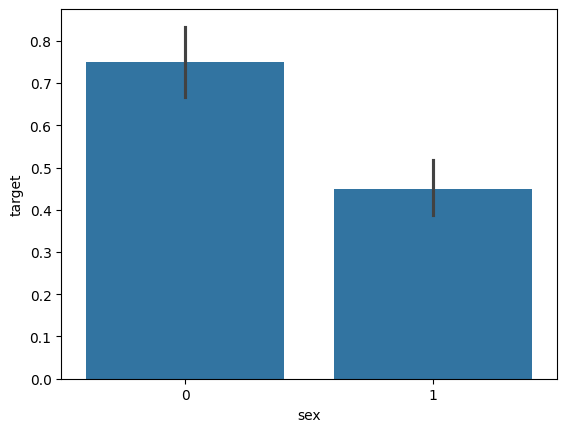

In [12]:
sns.barplot(x='sex',y='target',data=df)

<Axes: xlabel='age', ylabel='Count'>

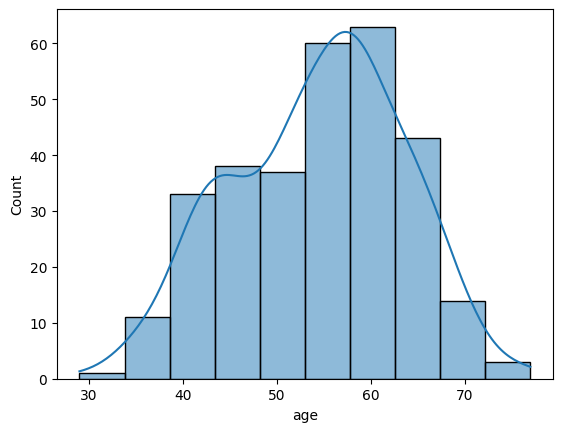

In [13]:
sns.histplot(df['age'], kde=True, bins=10)

# spliting feature and target

In [14]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [15]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# performing training and testing

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [18]:
x.shape,x_train.shape,x_test.shape

((303, 13), (242, 13), (61, 13))

# model training

In [19]:
model_selection=LogisticRegression()
model_selection.fit(x_train,y_train)

LogisticRegression()

In [20]:
model_selection=LogisticRegression()
model_selection.fit(x_test,y_test)

LogisticRegression()

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_selection1=RandomForestClassifier()
model_selection1.fit(x_train,y_train)

RandomForestClassifier()

# model evaluation

In [22]:
model_selection.score(x_train,y_train)

0.756198347107438

In [23]:
model_selection1.score(x_train,y_train)#randomforest

1.0

# accuracy score

In [24]:
#accuracy on train data...
x_train_prediction=model_selection.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:", training_data_accuracy)

#accuracy on testing data...
x_test_prediction=model_selection.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("accuracy on testing data:", testing_data_accuracy)

accuracy on training data: 0.756198347107438
accuracy on testing data: 0.8360655737704918


In [25]:
#randomforest
#accuracy on train data...
x_train_prediction=model_selection1.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:", training_data_accuracy)

#accuracy on testing data...
x_test_prediction=model_selection1.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("accuracy on testing data:", testing_data_accuracy)

accuracy on training data: 1.0
accuracy on testing data: 0.7868852459016393


## **Build a predictive system**

In [26]:
# Input data (from patient)
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak,
	#slope, ca, thal.....)

#change the input data to numpy arr
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#prediction using trained model
prediction=model_selection.predict(input_data_reshaped)
print(prediction)

#output prediction
if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
  print("the person has heart disease")

[1]
the person has heart disease


In [27]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#change the input data to numpy arr
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_selection.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
  print("the person has heart disease")

[0]
the person does not have a heart disease


In [28]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#change the input data to numpy arr
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_selection1.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
  print("the person has heart disease")

[1]
the person has heart disease


# **Visualization**

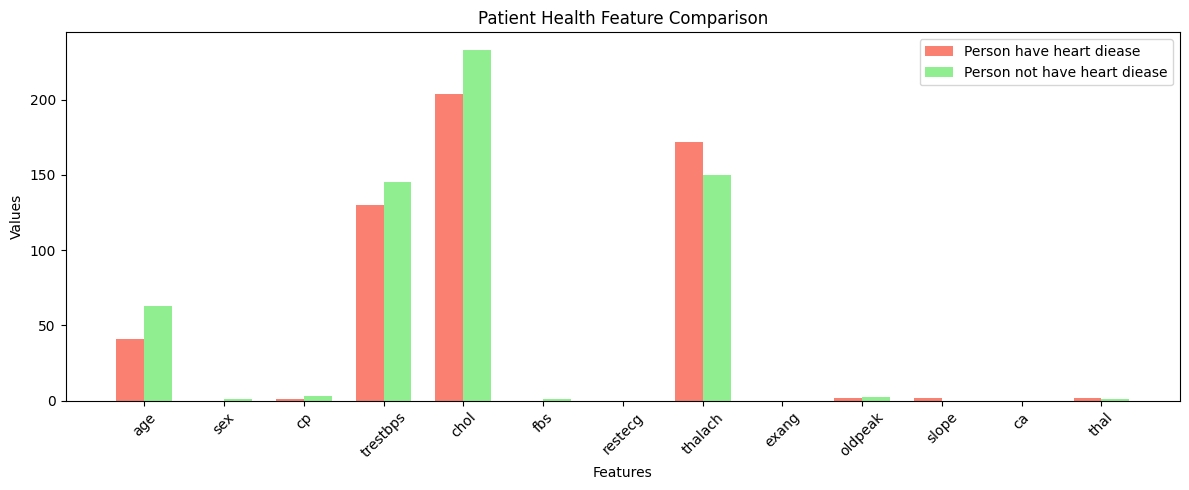

In [29]:
import matplotlib.pyplot as plt

# Feature names based on Heart Disease dataset
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal']

# Input values
input_data1 = (41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2)
input_data2=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# X-axis positions
x = np.arange(len(features))
width = 0.35  # width of each bar

# Plotting side-by-side bars
plt.figure(figsize=(12, 5))
plt.bar(x - width/2, input_data1, width, label='Person have heart diease', color='salmon')
plt.bar(x + width/2, input_data2, width, label='Person not have heart diease', color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title("Patient Health Feature Comparison")
plt.xticks(x, features, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


1. thalach = Maximum Heart Rate Achieved

2. trestbps = Resting Blood Pressure

[[22  6]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



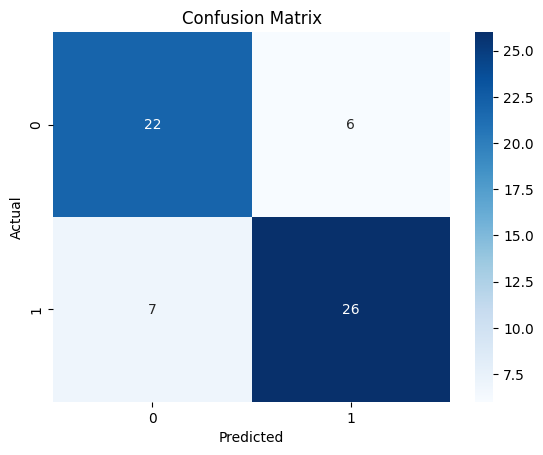

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, x_test_prediction))
print(classification_report(y_test, x_test_prediction))

#visualize confusion matrix
cm = confusion_matrix(y_test, x_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**thankyou**